In [ ]:
import numpy as np
import matplotlib.pyplot as plt

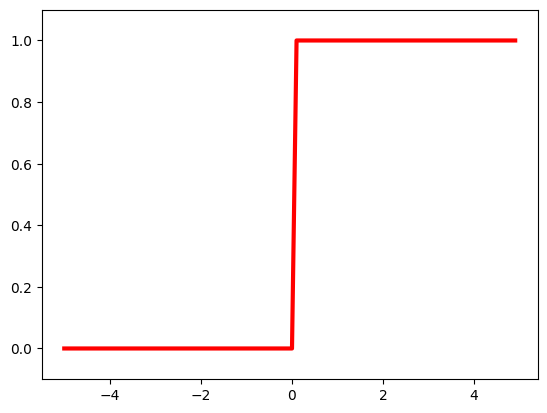

In [10]:
# 绘制阶越函数
def step_function(x):
    res=x>0
    return np.array(x>0 , dtype=np.uint32)
x = np.arange(-5.0 , 5.0, 0.1)
y = step_function(x)
plt.plot(x , y , 'red' , linewidth = 3)
plt.ylim(-0.1 , 1.1)
plt.show() 

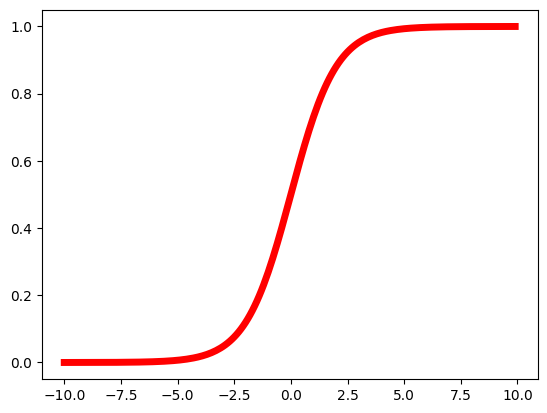

In [15]:
# sigmoid 函数的实现
def sigmoid(x):
    return(1/(1+np.exp(-x)))
x = np.arange(-10 , 10 , 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x , y1 , 'red' , linewidth = 5 )
plt.show()

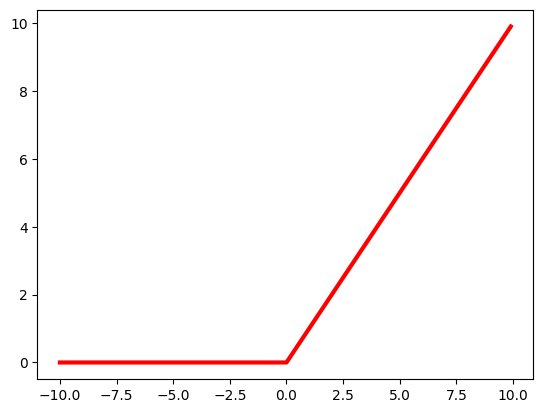

In [17]:
#Relu函数的实现
def RELU(x):
    return np.maximum(0 , x)
x = np.arange(-10 , 10 ,0.1)
y = RELU(x)
plt.plot(x , y , 'red' , linewidth = 3)
plt.show()

In [29]:
A = np.array([1 , 2 , 3 , 4 ])
B = np.array([2 , 3 , 4 , 5 ])

In [36]:
A = np.array([[2 , 3 , 4],[ 4 , 5 , 6 ],[5 , 7 , 8]])
B = np.array([[2 , 5 , 7 , 10 ],[1 , 5 , 7 , 9],[5 , 7 , 9 , 8]])
C=np.dot(A , B)
A , B ,C

(array([[2, 3, 4],
        [4, 5, 6],
        [5, 7, 8]]),
 array([[ 2,  5,  7, 10],
        [ 1,  5,  7,  9],
        [ 5,  7,  9,  8]]),
 array([[ 27,  53,  71,  79],
        [ 43,  87, 117, 133],
        [ 57, 116, 156, 177]]))

In [37]:
import numpy as np
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

In [43]:
def load_data_from_pytorch():
    print("正在使用 PyTorch 下载/加载数据...")
    
    # 1. 使用 PyTorch 的工具下载数据
    # train=True 下载训练集，train=False 下载测试集
    train_set = datasets.MNIST(root='./data', train=True, download=True)
    test_set = datasets.MNIST(root='./data', train=False, download=True)
    
    # 2. 提取数据并转换为 NumPy 数组
    # .data 是图像张量 (60000, 28, 28)
    # .targets 是标签张量 (60000)
    x_train_raw = train_set.data.numpy()
    y_train = train_set.targets.numpy()
    
    x_test_raw = test_set.data.numpy()
    y_test = test_set.targets.numpy()
    
    # 3. 预处理：展平 (Flatten) + 转置 (Transpose) + 归一化 (Normalize)
    # 原始形状 (60000, 28, 28) -> 展平 (60000, 784) -> 转置 (784, 60000)
    # 最终形状符合我们 NumPy 网络的输入要求：每一列是一个样本
    x_train = x_train_raw.reshape(x_train_raw.shape[0], -1).T / 255.0
    x_test = x_test_raw.reshape(x_test_raw.shape[0], -1).T / 255.0
    
    return x_train, y_train, x_test, y_test
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size , Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    return one_hot_Y.T

正在使用 PyTorch 下载/加载数据...
------------------------------
训练集 X 形状: (784, 60000)
训练集 Y 形状: (60000,)
数据类型: <class 'numpy.ndarray'>
------------------------------


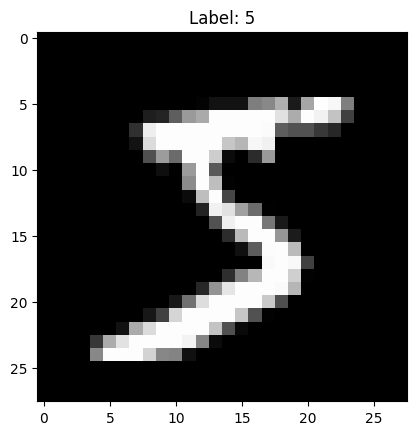

In [44]:
x_train, y_train, x_test, y_test = load_data_from_pytorch()

print("-" * 30)
print(f"训练集 X 形状: {x_train.shape}")  # 应该是 (784, 60000)
print(f"训练集 Y 形状: {y_train.shape}")  # 应该是 (60000,)
print(f"数据类型: {type(x_train)}")       # 应该是 <class 'numpy.ndarray'>
print("-" * 30)

# 画一张图确认没问题
img = x_train[:, 0].reshape(28, 28) # 取第一列，还原成图片形状
plt.imshow(img, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [45]:
class DEEPLEARNING:
    def __init__(self, input_size, hidden_size , output_size):
        self.w1 = np.random.randn(hidden_size , input_size)*np.sqrt(2./input_size)
        self.b1 = np.zeros((hidden_size , 1))
        self.w2 = np.random.randn(output_size , hidden_size)*np.sqrt(2./hidden_size)
        self.b2 = np.zeros((output_size , 1))
    def RELU(self , x):
        return np.maximum(0 , x)
    def softmax(self,Z):
        exp_Z = np.exp(Z - np.max(Z , axis=0 , keepdims=True))
        return exp_Z/np.sum(exp_Z , axis=0 , keepdims=True)
    def relu_deriv(self, Z):
        return Z > 0
    def forward_prop(self, X):
        # 第一层
        self.Z1 = np.dot(self.w1, X) + self.b1
        self.A1 = self.RELU(self.Z1)
        
        # 第二层 (输出层)
        self.Z2 = np.dot(self.w2, self.A1) + self.b2
        self.A2 = self.softmax(self.Z2)
        
        return self.A2
    def backward_prop(self, X, Y, learning_rate):
        m = X.shape[1] # 样本数量
        
        # --- 反向传播核心 (链式法则) ---
        
        # 输出层误差 (Softmax + CrossEntropy 的导数恰好是 A - Y)
        dZ2 = self.A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        
        # 隐藏层误差
        dZ1 = np.dot(self.w2.T, dZ2) * self.relu_deriv(self.Z1)
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
        
        # --- 梯度下降更新参数 ---
        self.w1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.w2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    def compute_accuracy(self, predictions, Y):
        return np.mean(predictions == Y)
    def train(self, X, Y, epochs, learning_rate):
        Y_one_hot = one_hot(Y)
        
        for i in range(epochs):
            # 1. 前向传播
            A2 = self.forward_prop(X)
            
            # 2. 反向传播与更新
            self.backward_prop(X, Y_one_hot, learning_rate)
            
            # 每50次打印一次进度
            if i % 50 == 0:
                predictions = np.argmax(A2, axis=0)
                acc = self.compute_accuracy(predictions, Y)
                print(f"Epoch {i}: 准确率 = {acc:.4f}")

    def predict(self, X):
        A2 = self.forward_prop(X)
        return np.argmax(A2, axis=0)

In [46]:
if __name__ == "__main__":
    # 使用 PyTorch 加载数据转为 NumPy
    x_train, y_train, x_test, y_test = load_data_from_pytorch()
    
    # 初始化 NumPy 网络
    dnn = DEEPLEARNING(input_size=784, hidden_size=128, output_size=10)
    
    # 开始训练
    dnn.train(x_train, y_train, epochs=500, learning_rate=0.1)
    
    # 验证
    predictions = dnn.predict(x_test)
    print(f"准确率: {np.mean(predictions == y_test)}")

正在使用 PyTorch 下载/加载数据...
Epoch 0: 准确率 = 0.1093
Epoch 50: 准确率 = 0.8450
Epoch 100: 准确率 = 0.8804
Epoch 150: 准确率 = 0.8931
Epoch 200: 准确率 = 0.9009
Epoch 250: 准确率 = 0.9059
Epoch 300: 准确率 = 0.9104
Epoch 350: 准确率 = 0.9140
Epoch 400: 准确率 = 0.9174
Epoch 450: 准确率 = 0.9202
准确率: 0.9229



[开始全量评估]
测试集总样本数: 10000
最终准确率: 92.29%

[随机抽取样本测试]
图中的数字是: 7
模型预测结果: 7
✅ 预测正确


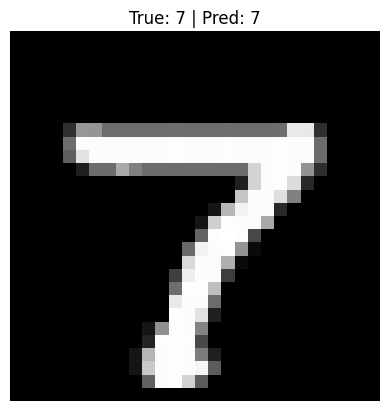

In [47]:
def evaluate_accuracy(model, x_test, y_test):
    print("\n[开始全量评估]")
    # 1. 模型预测
    # x_test 形状应该是 (784, 10000)
    predictions = model.predict(x_test)
    
    # 2. 对比预测值和真实标签
    # predictions == y_test 会生成一个布尔数组 [True, False, True...]
    # np.mean 会把 True 当作 1，False 当作 0，计算平均值即为准确率
    accuracy = np.mean(predictions == y_test)
    
    print(f"测试集总样本数: {y_test.shape[0]}")
    print(f"最终准确率: {accuracy * 100:.2f}%")
    return accuracy

# ==========================================
# 场景 2：可视化单张图片测试 (随机抽取)
# ==========================================
def visual_test(model, x_test, y_test):
    print("\n[随机抽取样本测试]")
    
    # 随机选一个索引
    index = np.random.randint(0, x_test.shape[1])
    
    # 1. 取出数据
    # 注意：取出的是 (784,) 的一维数组
    image_vector = x_test[:, index]
    true_label = y_test[index]
    
    # 2. 形状调整 (关键步骤！)
    # 我们的网络期望输入是矩阵 (特征, 样本数)。
    # 即使只有一个样本，也必须变成 (784, 1)，否则矩阵乘法会报错。
    input_vector = image_vector.reshape(-1, 1)
    
    # 3. 预测
    prediction = model.predict(input_vector)[0] # 取出数组中的第一个元素
    
    # 4. 绘图
    print(f"图中的数字是: {true_label}")
    print(f"模型预测结果: {prediction}")
    
    if prediction == true_label:
        print("✅ 预测正确")
    else:
        print("❌ 预测错误")

    # 还原成 28x28 用于显示
    plt.imshow(image_vector.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label} | Pred: {prediction}")
    plt.axis('off') # 不显示坐标轴
    plt.show()

# --- 执行测试 ---
# 假设 dnn 是你已经训练好的模型实例
# 假设 x_test, y_test 已经由之前的 load_data_from_pytorch 加载完毕

# 1. 跑分
evaluate_accuracy(dnn, x_test, y_test)

# 2. 看图 (你可以多运行几次这行代码看不同的图)
visual_test(dnn, x_test, y_test)